## 通し課題➀ クラス分類

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. データの読み込みとデータ表示

In [2]:
df = pd.read_csv('input/ks-projects-201801.csv')

In [3]:
display(df.head(5))

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
display(df.describe())
print(df.info())
print(df.isnull().sum())

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None
ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   

In [5]:
# state列のsuccessfulを1、それ以外を0に割り振る
df['state'] = (df['state'] == 'successful') * 1

# deadlineとlaunchedから新しい特徴量durationを作成
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df['duration'] = (df['deadline'] - df['launched']).dt.days
df.head(8)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,55
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,52375.0,50000.00,34
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,1,16,US,1205.0,1205.0,1000.00,19
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,0,40,US,453.0,453.0,25000.00,44


### 2. データの可視化

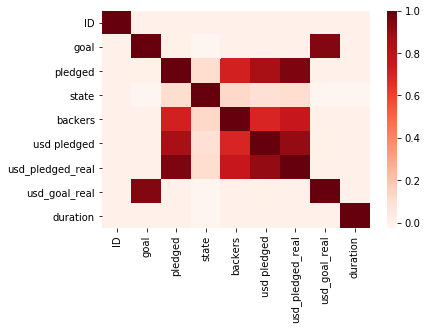

In [6]:
sns.heatmap(df.corr(), cmap="Reds")
plt.show()

### 3. データの前処理

In [7]:
# 不要な列の削除
drop_columns_list = ['ID', 'name', 'goal', 'pledged', 'usd pledged', 'deadline', 'launched', 'category']
df.drop(drop_columns_list, axis=1, inplace=True)

# カテゴリ変数を数値に変換する
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_feature = ['main_category', 'currency', 'country']
df[categorical_feature] = df[categorical_feature].apply(encoder.fit_transform)

In [8]:
display(df.head(8))
display(df.describe())
df.info()

,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,duration
0,12,5,0,0,9,0.0,1533.95,58
1,6,13,0,15,22,2421.0,30000.00,59
2,6,13,0,3,22,220.0,45000.00,44
3,10,13,0,1,22,1.0,5000.00,29
4,6,13,0,14,22,1283.0,19500.00,55
5,7,13,1,224,22,52375.0,50000.00,34
6,7,13,1,16,22,1205.0,1000.00,19
7,7,13,0,40,22,453.0,25000.00,44


,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,duration
count,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,3.786610e+05,3.786610e+05,378661.000000
mean,7.513010,11.000578,0.353762,105.617476,18.850764,9.058924e+03,4.545440e+04,33.481122
std,3.904719,3.944783,0.478137,907.185035,6.270406,9.097334e+04,1.152950e+06,65.909172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e-02,0.000000
25%,5.000000,13.000000,0.000000,2.000000,22.000000,3.100000e+01,2.000000e+03,29.000000
50%,7.000000,13.000000,0.000000,12.000000,22.000000,6.243300e+02,5.500000e+03,29.000000
75%,10.000000,13.000000,1.000000,56.000000,22.000000,4.050000e+03,1.550000e+04,36.000000
max,14.000000,13.000000,1.000000,219382.000000,22.000000,2.033899e+07,1.663614e+08,16738.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 8 columns):
main_category       378661 non-null int32
currency            378661 non-null int32
state               378661 non-null int32
backers             378661 non-null int64
country             378661 non-null int32
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
duration            378661 non-null int64
dtypes: float64(2), int32(4), int64(2)
memory usage: 17.3 MB


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# データを訓練用とテスト用に分ける。
X = df.drop('state', axis=1).values
y = df['state'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, shuffle=True)

# 標準化を行う。
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4. モデルの学習と評価
#### 4.1 K交差検証法を用いて各モデルの精度を確認する


In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, precision_recall_fscore_support

In [11]:
def train_model(X, y, model_name='log_regr', use_scaler=False):
    '''
    k-交差検証法によるモデル評価
    '''
    n_split = 5

    cross_valid_accuracy = 0
    split_num = 1

    for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=2020).split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        if use_scaler:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        
        if model_name == 'support_vector_machine':
            model = SVC(C=10, kernel='rbf', gamma='scale')
        elif model_name == 'random_forest':
            model = RandomForestClassifier(n_estimators=50, max_depth=10, criterion="gini", min_samples_leaf=2, min_samples_split=2, random_state=2020)
        elif model_name == 'adaboost':
            model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, random_state=2020, criterion="gini"), n_estimators=30, random_state=2020)
        else:
            model = SGDClassifier(loss='log', penalty='l2', alpha=0.01, max_iter=10000, fit_intercept=True, random_state=2020, tol=1e-3)
        
        model.fit(X_train, y_train)

        # テストデータに対する予測
        y_pred_test = model.predict(X_test)
        
        # テストデータに対する正答率を計算
        accuracy =  accuracy_score(y_test, y_pred_test)
        print("Fold %s"%split_num)
        print('正答率（Accuracy） = {:.3f}%\n'.format(100 * accuracy))
        
        cross_valid_accuracy += accuracy
        split_num += 1

    # 平均正答率を最終的な汎化誤差値とする
    final_accuracy = cross_valid_accuracy / n_split
    print('Cross Validation Accuracy = {:.3f}%'.format(100 * final_accuracy))

In [12]:
X = df.drop('state', axis=1).values
y = df['state'].values

In [13]:
train_model(X, y, model_name='log_regr', use_scaler=True)

Fold 1
正答率（Accuracy） = 70.249%

Fold 2
正答率（Accuracy） = 70.133%

Fold 3
正答率（Accuracy） = 70.100%

Fold 4
正答率（Accuracy） = 69.945%

Fold 5
正答率（Accuracy） = 69.948%

Cross Validation Accuracy = 70.075%


In [14]:
train_model(X, y, model_name='random_forest', use_scaler=True)

Fold 1
正答率（Accuracy） = 98.707%

Fold 2
正答率（Accuracy） = 98.695%

Fold 3
正答率（Accuracy） = 98.707%

Fold 4
正答率（Accuracy） = 98.711%

Fold 5
正答率（Accuracy） = 98.719%

Cross Validation Accuracy = 98.708%


In [15]:
train_model(X, y, model_name='adaboost', use_scaler=True)

Fold 1
正答率（Accuracy） = 99.249%

Fold 2
正答率（Accuracy） = 99.217%

Fold 3
正答率（Accuracy） = 99.259%

Fold 4
正答率（Accuracy） = 99.206%

Fold 5
正答率（Accuracy） = 99.241%

Cross Validation Accuracy = 99.234%


#### 4.2 GridSearchCVを用いて最適なハイパーパラメータを探索する

In [16]:
def grid_search(X_train, y_train, model, parameters):
    clf = GridSearchCV(model, parameters, cv=5, verbose=2, n_jobs=5)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    return clf.best_params_

In [17]:
parameters = {
    'n_estimators': [10, 30, 50],
    'max_depth': [5, 10, 30]
}
random_forest = RandomForestClassifier(criterion="gini", min_samples_leaf=2, min_samples_split=2, random_state=2020)
best_params = grid_search(X_train, y_train, random_forest, parameters)
random_forest = RandomForestClassifier(**best_params, criterion="gini", min_samples_leaf=2, min_samples_split=2, random_state=2020)
random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   41.6s
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.1min finished
{'max_depth': 30, 'n_estimators': 50}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=2020, verbose=0,
            warm_start=False)

In [19]:
# アダブーストの最終モデル
parameters = {
    'base_estimator': [DecisionTreeClassifier(max_depth=x, min_samples_leaf=2, min_samples_split=2, random_state=2020, criterion="gini") for x in [3, 5, 10]],
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [30, 50]
}
adaboost = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=2, random_state=2020, criterion="gini"), random_state=2020)
best_params = grid_search(X_train, y_train, adaboost, parameters)
adaboost = AdaBoostClassifier(**best_params)
adaboost.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:  8.7min finished
{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2020,
            splitter='best'), 'learning_rate': 0.5, 'n_estimators': 50}


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2020,
            splitter='best'),
          learning_rate=0.5, n_estimators=50, random_state=None)

#### 4.3 モデルの評価

In [20]:
def evaluate_model(model, X_test, y_test):
    '''
    テストデータに対する評価
    '''
    # ラベルを予測
    y_pred = model.predict(X_test)

    # 対数尤度を表示
    print('対数尤度 = {:.3f}'.format(-log_loss(y_test, y_pred)))

    # 正答率を計算
    accuracy =  accuracy_score(y_test, y_pred)
    print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

    # Precision, Recall, F1-scoreを計算
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

    # Precision, Recall, F1-scoreを表示
    print('適合率（Precision） = {:.3f}%'.format(100 * precision[1]))
    print('再現率（Recall） = {:.3f}%'.format(100 * recall[1]))
    print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[1]))

    # 予測値と正解のクロス集計（混同行列）
    conf_mat = confusion_matrix(y_test, y_pred)
    conf_mat = pd.DataFrame(conf_mat, index=['正解', '正解'], columns=['予測', '予測'])
    display(conf_mat)

In [21]:
evaluate_model(random_forest, X_test, y_test)

対数尤度 = -0.239
正答率（Accuracy） = 99.309%
適合率（Precision） = 98.270%
再現率（Recall） = 99.802%
F1値（F1-score） = 99.030%


,予測,予測
正解,48518,470
正解,53,26692


In [22]:
evaluate_model(adaboost, X_test, y_test)

対数尤度 = -0.192
正答率（Accuracy） = 99.443%
適合率（Precision） = 98.647%
再現率（Recall） = 99.791%
F1値（F1-score） = 99.216%


,予測,予測
正解,48622,366
正解,56,26689
